<text>
        <h1>Project: Crypto predict</h1>
        <h4>For this project I will try to train a machine such that for analyzing a set of data (in this case crypto currency), will be able to predict an outcome.
                The data will be ploted in alongside the actual data in real life.
                The main principle of this project is to give the machine a set of data from a period of time and to determine the outcome for the upcoming days. More data will mean more accurate results , but with a longer execution time of the program.
        <text> As libray used worth we can list:
                <li><a href="https://www.w3schools.com/python/pandas/default.asp">Pandas - used for data manipulation  </a> </li> 
                <li>Sklearn - for MinMax Scaller <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">  MinMaxScaler  </a></li>
                <li>Tensorflow  <a href="https://keras.io/api/layers/">  Keras layers </a> and <a href="https://keras.io/guides/sequential_model/">  Keras sequential </a>li>
                <li>Tkinter - used for GUI <a href="https://www.tutorialspoint.com/python/python_gui_programming.htm">  Tkinter </a></li>
                <li><a href="https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam">Adam optimizer</a></li>
        </text>
        </h4>
        <h3>Commannds:</h3> 
        <h4> pip install -U scikit-learn </h4> 
        <h4> pip install --upgrade tensorflow </h4> 
        <h4> pip install --upgrade mplfinance </h4>
        <h4> pip install --upgrade pandas-datareader </h4>
</text>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as prd
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tkinter import *

<text> 
    <h3>Processing data</h3>
    In the followin part, I will use tkinter to display some instructions for using the program on new window.<br>
    Moving forward , we will make use of the ticker values of a given/wanted crypto in order to load the in the next step and we will also provide an actual currency to have an ideea of the real value of the crypto.  
</text>

In [2]:

def onclick(args):


    if args == 1:
           print()
    root.destroy()
    
root = Tk()
root.title("Crypto")
text_ticker = Entry(root, width=100)
text_ticker.insert(0,"For the following cryptos you'll be provided with the corresponding tickers. For example for Etherium is ETH")
text_ticker.pack()

btn1 = Button(root, text="Close",command=lambda:onclick(1))
btn1.pack()

list_of_crytpos_shortcuts = ['BTC' , 'ETH' , 'ADA' , 'BNB' , 'XRP'] #ticker for some cryptos

cryptos = list_of_crytpos_shortcuts[1]
crypto_currency = cryptos
print(crypto_currency)
root.mainloop()
vs_currency = 'USD'


ETH



<text>
    In the following sequence we specified the time from when the data will be given to the machine so that it can be trained.<br>
    We will read and load the data from the specified time interval  from yahoo currecny api.
    Using MinMax Scaler we will resize the data in values between 0 and 1 for my neural network.
    Lookin in the given past days , our machine will be able to predict the currency for a number of upcoming days.
</text>

In [3]:
start  = dt.datetime(2016,1,1)
end = dt.datetime.now()
data = prd.DataReader(f'{crypto_currency}-{vs_currency}' , 'yahoo' , start , end)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

past_train_days = 60
future_days = 10

x_train, y_train = [] , []

In [4]:
for x in range(past_train_days, len(scaled_data) - future_days):
    x_train.append(scaled_data[x-past_train_days:x, 0])
    y_train.append(scaled_data[x + future_days, 0])


x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

<text>
        Creating model and creating the Neural Network. <br>
        LTSM is used for memoryzing sequential data(crypto currency is a sequential data). <br>
        Dropout will be used to not overfit the layer.
</text>

In [5]:
model = Sequential()

model.add(LSTM(units=50, return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))


model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
60/60 [==============================] - 9s 45ms/step - loss: 0.0049
Epoch 2/25
60/60 [==============================] - 3s 48ms/step - loss: 0.0024
Epoch 3/25
60/60 [==============================] - 3s 49ms/step - loss: 0.0022
Epoch 4/25
60/60 [==============================] - 3s 49ms/step - loss: 0.0024
Epoch 5/25
60/60 [==============================] - 3s 46ms/step - loss: 0.0025
Epoch 6/25
60/60 [==============================] - 3s 45ms/step - loss: 0.0022
Epoch 7/25
60/60 [==============================] - 3s 45ms/step - loss: 0.0021
Epoch 8/25
60/60 [==============================] - 3s 45ms/step - loss: 0.0021
Epoch 9/25
60/60 [==============================] - 3s 45ms/step - loss: 0.0020
Epoch 10/25
60/60 [==============================] - 3s 45ms/step - loss: 0.0023
Epoch 11/25
60/60 [==============================] - 3s 45ms/step - loss: 0.0022
Epoch 12/25
60/60 [==============================] - 3s 44ms/step - loss: 0.0019
Epoch 13/25
60/60 [==================

<text>
<h2>Testing</h2>
<h4>
    In the following sequence the main point will be around testing and represnting the data.<br>
    We will create the test data set and using the trained data we will try to predict the outcome of a crypto , ploting both actual data and predicted data.
</h4>
</text>

In [6]:
test_start = dt.datetime(2021,1,1)
test_end = dt.datetime.now()

test_Data = prd.DataReader(f'{crypto_currency}-{vs_currency}', 'yahoo' , test_start, test_end)
prizes = test_Data['Close'].values

total_data = pd.concat((data['Close'], test_Data['Close']))

model_inp = total_data[len(total_data) - len(test_Data) - past_train_days:].values
model_inp = model_inp.reshape(-1,1)
model_inp = scaler.fit_transform(model_inp)

In [7]:
x_test = []

for x in range(past_train_days, len(model_inp)):
    x_test.append(model_inp[x - past_train_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))


prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

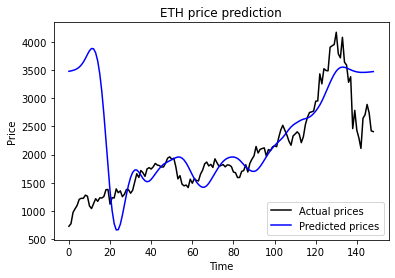

In [8]:
plt.plot(prizes, color='black', label = 'Actual prices')
plt.plot(prediction_prices, color='blue', label = 'Predicted prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


<text>
    <h3>Personal Opinion:</h3>
        <h4>
            For this project you need to use a lot of datas to train the machine in order to make a prediction.<br> 
            So the more data from a longer period of time you provide to the machine, a more accurate result will provide.<br>
            Taking that into account the predicted data is not off the real charts but will be better for a better tained machine. <br>
            What I wanted to also add: 
                <li>I really wanted to add candle cahrts to the representation</li>
                <li>And also i wanted to make an interface for a user to select a crypto from a given list, not to select from the code</li>
    </h4>
</text>